<a href="https://colab.research.google.com/github/navi004/Deep-Learning-CSE4037-/blob/main/22mia1049_DL_DA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DL Digital Assignment -1
* Naveen Nidadavolu
* 22MIA1049

## Import Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (
    Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,
    Activation, Add, UpSampling2D, Concatenate, GlobalAveragePooling2D
)
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10


## Load and Preprocess CIFAR-10

In [3]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

# Print dataset shape
print("Training set shape:", x_train.shape)  # (50000, 32, 32, 3)
print("Test set shape:", x_test.shape)       # (10000, 32, 32, 3)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step
Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


## Basic CNN
- Standard CNN architecture for image classification.
- Usage: Simple datasets, baseline comparisons.
- Architecture: Stack of Conv2D, MaxPooling, and Dense layers.

In [17]:
def basic_cnn(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2))(x)

    x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2))(x)

    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, x)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

cnn_model = basic_cnn((32,32,3), 10)
cnn_model.summary()
cnn_model.fit(x_train, y_train, epochs=10,batch_size=64, validation_data=(x_test, y_test))
test_loss, test_acc = cnn_model.evaluate(x_test, y_test, verbose=2)
print(f"Basic CNN Accuracy: {test_acc:.4f}")


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)          │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_73 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_74 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545,482 (2.08 MB)

 Trainable params: 545,290 (2.08 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.4638 - loss: 1.5643 - val_accuracy: 0.5580 - val_loss: 1.2173
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6762 - loss: 0.9112 - val_accuracy: 0.5758 - val_loss: 1.2368
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7419 - loss: 0.7372 - val_accuracy: 0.6631 - val_loss: 0.9793
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7891 - loss: 0.5993 - val_accuracy: 0.6693 - val_loss: 0.9927
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8302 - loss: 0.4808 - val_accuracy: 0.6754 - val_loss: 1.0259
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8719 - loss: 0.3659 - val_accuracy: 0.6164 - val_loss: 1.3749
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9000 - loss: 0.2915 - val_accuracy: 0.6026 - val_loss: 1.5754
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9209 - loss: 0.2253 - val_accuracy: 

## ResNet
 - Uses residual connections (skip connections) to prevent vanishing gradients in deep networks.
- Usage: Great for image classification tasks.
- Architecture: Stack of convolutional layers with identity shortcuts.


In [18]:
def resnet_block(x, filters, stride=1):
    shortcut = x
    x = Conv2D(filters, (3,3), strides=stride, padding="same", activation="relu")(x)
    x = BatchNormalization()(x)
    x = Conv2D(filters, (3,3), padding="same")(x)
    x = BatchNormalization()(x)

    if stride != 1 or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, (1,1), strides=stride, padding="same")(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = Activation("relu")(x)
    return x

def resnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)

    x = resnet_block(x, 32)
    x = resnet_block(x, 64, stride=2)
    x = resnet_block(x, 64)

    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, x)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

resnet_model = resnet((32,32,3), 10)
resnet_model.summary()
resnet_model.fit(x_train, y_train, epochs=10,batch_size=64, validation_data=(x_test,y_test))
test_loss, test_acc = resnet_model.evaluate(x_test, y_test, verbose=2)
print(f"ResNet Accuracy: {test_acc:.4f}")


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13            │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_75 (Conv2D)        │ (None, 32, 32, 32)     │            896 │ input_layer_13[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_21    │ (None, 32, 32, 32)     │            128 │ conv2d_75[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_76 (Conv2D)        │ (None, 32, 32, 32)     │          9,248 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_22    │ (None, 32, 32, 32)     │            128 │ conv2d_76[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_77 (Conv2D)        │ (None, 32, 32, 32)     │          9,248 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_23    │ (None, 32, 32, 32)     │            128 │ conv2d_77[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_3 (Add)               │ (None, 32, 32, 32)     │              0 │ batch_normalization_2… │
│                           │                        │                │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 32, 32, 32)     │              0 │ add_3[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_78 (Conv2D)        │ (None, 16, 16, 64)     │         18,496 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_24    │ (None, 16, 16, 64)     │            256 │ conv2d_78[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_79 (Conv2D)        │ (None, 16, 16, 64)     │         36,928 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_80 (Conv2D)        │ (None, 16, 16, 64)     │          2,112 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_25    │ (None, 16, 16, 64)     │            256 │ conv2d_79[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_26    │ (None, 16, 16, 64)     │            256 │ conv2d_80[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_4 (Add)          

 Total params: 153,098 (598.04 KB)

 Trainable params: 152,266 (594.79 KB)

 Non-trainable params: 832 (3.25 KB)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step - accuracy: 0.4488 - loss: 1.5217 - val_accuracy: 0.5644 - val_loss: 1.2068
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6684 - loss: 0.9471 - val_accuracy: 0.6579 - val_loss: 0.9599
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7299 - loss: 0.7720 - val_accuracy: 0.6457 - val_loss: 0.9916
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7680 - loss: 0.6601 - val_accuracy: 0.7248 - val_loss: 0.8304
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8003 - loss: 0.5799 - val_accuracy: 0.7114 - val_loss: 0.8306
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8220 - loss: 0.5152 - val_accuracy: 0.7116 - val_loss: 0.8464
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8384 - loss: 0.4694 - val_accuracy: 0.7428 - val_loss: 0.7845
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8584 - loss: 0.4123 - val_

## UNet

- A fully convolutional network designed for image segmentation.
- Usage: Medical imaging, object segmentation.
- Architecture: Encoder-decoder structure with skip connections.



In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Function to create convolutional blocks
def conv_block(x, filters):
    x = layers.Conv2D(filters, (3,3), activation='relu', padding='same')(x)
    x = layers.Conv2D(filters, (3,3), activation='relu', padding='same')(x)
    return x

# Input layer for CIFAR-10 (32x32 RGB)
inputs_unet = layers.Input(shape=(32,32,3))

# Encoder with reduced filters
c1 = conv_block(inputs_unet, 16)
p1 = layers.MaxPooling2D((2,2))(c1)
c2 = conv_block(p1, 32)
p2 = layers.MaxPooling2D((2,2))(c2)

# Bottleneck with reduced filters
bn = conv_block(p2, 64)

# Decoder with skip connections
u1 = layers.UpSampling2D((2,2))(bn)
u1 = layers.concatenate([u1, c2])
c3 = conv_block(u1, 32)
u2 = layers.UpSampling2D((2,2))(c3)
u2 = layers.concatenate([u2, c1])
c4 = conv_block(u2, 16)

# Classification head
gap = layers.GlobalAveragePooling2D()(c4)  # Flatten spatial features
outputs_unet = layers.Dense(10, activation='softmax')(gap)  # 10 classes in CIFAR-10

# Build and compile the model
unet_model = models.Model(inputs=inputs_unet, outputs=outputs_unet)
unet_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Train and evaluate the model
print("Training Optimized U-Net-based model for CIFAR-10...")
unet_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))
test_loss, test_acc = unet_model.evaluate(x_test, y_test, verbose=2)

print(f"U-Net Accuracy on CIFAR-10: {test_acc:.4f}")
unet_model.summary()


Training Optimized U-Net-based model for CIFAR-10...
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.2064 - loss: 2.0382 - val_accuracy: 0.4369 - val_loss: 1.4737
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4461 - loss: 1.4502 - val_accuracy: 0.4981 - val_loss: 1.3155
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5592 - loss: 1.1939 - val_accuracy: 0.5582 - val_loss: 1.2527
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6271 - loss: 1.0237 - val_accuracy: 0.6454 - val_loss: 0.9817
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6766 - loss: 0.9019 - val_accuracy: 0.6821 - val_loss: 0.8863
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7068 - loss: 0.8228 - val_accuracy: 0.6623 - val_loss: 0.9560
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7300 - loss: 0.7648 - val_accuracy: 0.7081 - val_loss: 0.8331
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_58 (Conv2D)        │ (None, 32, 32, 16)     │            448 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_59 (Conv2D)        │ (None, 32, 32, 16)     │          2,320 │ conv2d_58[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_14          │ (None, 16, 16, 16)     │              0 │ conv2d_59[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_60 (Conv2D)        │ (None, 16, 16, 32)     │          4,640 │ max_pooling2d_14[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_61 (Conv2D)        │ (None, 16, 16, 32)     │          9,248 │ conv2d_60[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_15          │ (None, 8, 8, 32)       │              0 │ conv2d_61[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_62 (Conv2D)        │ (None, 8, 8, 64)       │         18,496 │ max_pooling2d_15[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_63 (Conv2D)        │ (None, 8, 8, 64)       │         36,928 │ conv2d_62[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_12          │ (None, 16, 16, 64)     │              0 │ conv2d_63[0][0]        │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_12            │ (None, 16, 16, 96)     │              0 │ up_sampling2d_12[0][0… │
│ (Concatenate)             │                        │                │ conv2d_61[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_64 (Conv2D)        │ (None, 16, 16, 32)     │         27,680 │ concatenate_12[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_65 (Conv2D)        │ (None, 16, 16, 32)     │          9,248 │ conv2d_64[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_13          │ (None, 32, 32, 32)     │              0 │ conv2d_65[0][0]        │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_13            │ (None, 32, 32, 48)     │              0 │ up_sampling2d_13[0][0… │
│ (Concatenate)             │                        │                │ conv2d_59[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_66 (Conv2D)        │ (None, 32, 32, 16)     │          6,928 │ concatenate_13[0][0]   │
├──────────────────────

 Total params: 355,280 (1.36 MB)

 Trainable params: 118,426 (462.60 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 236,854 (925.21 KB)

## AlexNet
- First deep CNN to win ImageNet challenge (2012).
- Usage: Historical benchmark for CNN-based classification.
- Architecture: Five convolutional layers, followed by dense layers.


In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Define AlexNet-like model
def alexnet(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    x = layers.Conv2D(96, (3, 3), strides=1, activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D(pool_size=(2, 2), strides=2)(x)

    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2), strides=2)(x)

    x = layers.Conv2D(192, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(192, (3, 3), activation='relu', padding='same')(x)

    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2), strides=2)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dense(512, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build and train the model
alex_model = alexnet((32, 32, 3), 10)
alex_model.summary()

print("Training AlexNet-like model on CIFAR-10...")
alex_model.fit(x_train, y_train, epochs=10,batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = alex_model.evaluate(x_test, y_test, verbose=2)
print(f"AlexNet Test Accuracy: {test_acc:.4f}")


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_68 (Conv2D)                   │ (None, 32, 32, 96)          │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 16, 16, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_69 (Conv2D)                   │ (None, 16, 16, 128)         │         110,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_70 (Conv2D)                   │ (None, 8, 8, 192)           │         221,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_71 (Conv2D)                   │ (None, 8, 8, 192)           │         331,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_72 (Conv2D)                   │ (None, 8, 8, 128)           │         221,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,204,938 (8.41 MB)

 Trainable params: 2,204,938 (8.41 MB)

 Non-trainable params: 0 (0.00 B)

Training AlexNet-like model on CIFAR-10...
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.3011 - loss: 1.8474 - val_accuracy: 0.5496 - val_loss: 1.2297
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.5836 - loss: 1.1569 - val_accuracy: 0.6392 - val_loss: 1.0081
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6754 - loss: 0.9173 - val_accuracy: 0.6732 - val_loss: 0.9403
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7305 - loss: 0.7621 - val_accuracy: 0.6935 - val_loss: 0.8989
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7711 - loss: 0.6406 - val_accuracy: 0.7320 - val_loss: 0.7759
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8119 - loss: 0.5347 - val_accuracy: 0.7490 - val_loss: 0.7494
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8398 - loss: 0.4541 - val_accuracy: 0.7273 - val_loss: 0.8468
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/ste

## MobileNet
- Lightweight CNN optimized for mobile devices.
- Usage: Mobile-friendly classification, detection.
- Architecture: Uses depthwise separable convolutions.

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Define a MobileNetV2-like model
def mobilenet(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    # Resize to 64x64 (since MobileNetV2 benefits from slightly larger input sizes)
    x = layers.Resizing(64, 64)(inputs)

    # Use MobileNetV2 with a width multiplier of 0.25 for a lightweight model
    base_mobile = tf.keras.applications.MobileNetV2(weights=None,
                                                    include_top=False,
                                                    input_shape=(64, 64, 3),
                                                    alpha=0.25)  # Using a small alpha for fewer parameters
    x = base_mobile(x)
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build and train the model
mobilenet_model = mobilenet((32, 32, 3), 10)
mobilenet_model.summary()

print("Training MobileNetV2-based model on CIFAR-10...")
mobilenet_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = mobilenet_model.evaluate(x_test, y_test, verbose=2)
print(f"MobileNet Test Accuracy: {test_acc:.4f}")


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)          │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resizing_1 (Resizing)                │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_0.25_64 (Functional)     │ (None, 2, 2, 1280)          │         248,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_7           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 261,578 (1021.79 KB)

 Trainable params: 250,922 (980.16 KB)

 Non-trainable params: 10,656 (41.62 KB)

Training MobileNetV2-based model on CIFAR-10...
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 45ms/step - accuracy: 0.1848 - loss: 2.2000 - val_accuracy: 0.1000 - val_loss: 2.3289
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.3725 - loss: 1.6833 - val_accuracy: 0.1000 - val_loss: 2.4077
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.4447 - loss: 1.5077 - val_accuracy: 0.1000 - val_loss: 2.4786
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.5042 - loss: 1.3664 - val_accuracy: 0.1000 - val_loss: 2.5322
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.5582 - loss: 1.2351 - val_accuracy: 0.1222 - val_loss: 2.8018
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.5952 - loss: 1.1437 - val_accuracy: 0.3185 - val_loss: 2.1457
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.6168 - loss: 1.0796 - val_accuracy: 0.6049 - val_loss: 1.1598
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20

## EfficientNet
- Scales CNNs efficiently using compound scaling.
- Usage: High-performance image classification with fewer parameters.
- Architecture: Expands depth, width, and resolution simultaneously.

In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Define an EfficientNetB0-based model
def efficientnet(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    # Resize to 64x64 for better EfficientNet performance
    x = layers.Resizing(64, 64)(inputs)

    # Use EfficientNetB0 with reduced input resolution for faster training
    base_eff = tf.keras.applications.EfficientNetB0(weights=None,
                                                     include_top=False,
                                                     input_shape=(64, 64, 3))
    x = base_eff(x)
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build and train the model
eff_model = efficientnet((32, 32, 3), 10)
eff_model.summary()

print("Training EfficientNetB0-based model on CIFAR-10...")
eff_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = eff_model.evaluate(x_test, y_test, verbose=2)
print(f"EfficientNet Test Accuracy: {test_acc:.4f}")


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)          │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resizing_3 (Resizing)                │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 2, 2, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_9           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,062,381 (15.50 MB)

 Trainable params: 4,020,358 (15.34 MB)

 Non-trainable params: 42,023 (164.16 KB)

Training EfficientNetB0-based model on CIFAR-10...
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 188s 141ms/step - accuracy: 0.2729 - loss: 2.0432 - val_accuracy: 0.3252 - val_loss: 1.9368
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.4967 - loss: 1.3992 - val_accuracy: 0.5134 - val_loss: 1.3775
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.6052 - loss: 1.1217 - val_accuracy: 0.5905 - val_loss: 1.1973
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.6789 - loss: 0.9069 - val_accuracy: 0.6525 - val_loss: 0.9819
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 37ms/step - accuracy: 0.7346 - loss: 0.7629 - val_accuracy: 0.6802 - val_loss: 0.8969
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.7801 - loss: 0.6388 - val_accuracy: 0.7021 - val_loss: 0.8691
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.8078 - loss: 0.5563 - val_accuracy: 0.7219 - val_loss: 0.8523
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━

In [23]:
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# Evaluate each model
resnet_loss, resnet_acc = resnet_model.evaluate(x_test, y_test, verbose=0)
mobilenet_loss, mobilenet_acc = mobilenet_model.evaluate(x_test, y_test, verbose=0)
effnet_loss, effnet_acc = eff_model.evaluate(x_test, y_test, verbose=0)
unet_loss, unet_acc = unet_model.evaluate(x_test, y_test, verbose=0)
alexnet_loss, alexnet_acc = alex_model.evaluate(x_test, y_test, verbose=0)
basiccnn_loss, basiccnn_acc = cnn_model.evaluate(x_test, y_test, verbose=0)

# Store in dictionaries for easy access
model_names = ["ResNet", "MobileNetV2", "EfficientNetB0", "U-Net", "AlexNet", "Basic CNN"]
accuracy_values = [resnet_acc, mobilenet_acc, effnet_acc, unet_acc, alexnet_acc, basiccnn_acc]
loss_values = [resnet_loss, mobilenet_loss, effnet_loss, unet_loss, alexnet_loss, basiccnn_loss]


## Accuray and Loss Visualization

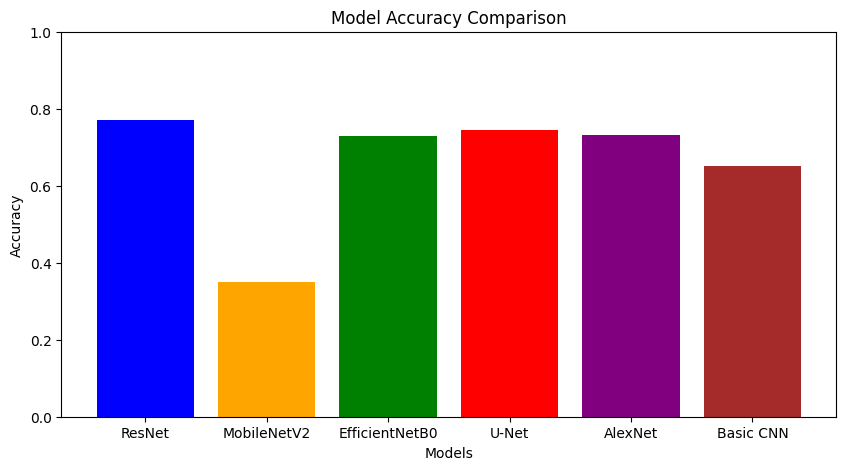

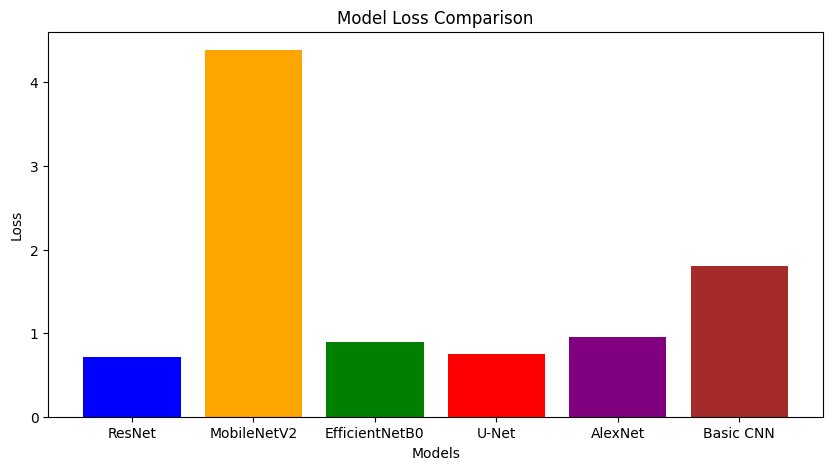

In [24]:
# Plot accuracy comparison
plt.figure(figsize=(10, 5))
plt.bar(model_names, accuracy_values, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

# Plot loss comparison
plt.figure(figsize=(10, 5))
plt.bar(model_names, loss_values, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.xlabel("Models")
plt.ylabel("Loss")
plt.title("Model Loss Comparison")
plt.show()


## Precison , Recall, F1-score

In [26]:
def get_classification_metrics(model, model_name):
    y_pred = np.argmax(model.predict(x_test), axis=1)  # Convert softmax output to labels
    y_true = np.argmax(y_test, axis=1)  # True labels
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_true, y_pred))

# Generate reports for each model
get_classification_metrics(resnet_model, "ResNet")
get_classification_metrics(mobilenet_model, "MobileNetV2")
get_classification_metrics(eff_model, "EfficientNetB0")
get_classification_metrics(unet_model, "U-Net")
get_classification_metrics(alex_model, "AlexNet")
get_classification_metrics(cnn_model, "Basic CNN")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

Classification Report for ResNet:
              precision    recall  f1-score   support

           0       0.85      0.70      0.77      1000
           1       0.93      0.84      0.88      1000
           2       0.81      0.64      0.71      1000
           3       0.72      0.46      0.56      1000
           4       0.78      0.77      0.77      1000
           5       0.78      0.69      0.73      1000
           6       0.60      0.94      0.73      1000
           7       0.87      0.81      0.84      1000
           8       0.75      0.94      0.83      1000
           9       0.75      0.94      0.84      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step

Classification Report for MobileNetV2:
              precision    recall  f1-score   support

           0       0.48     

## Confusion Matrices

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


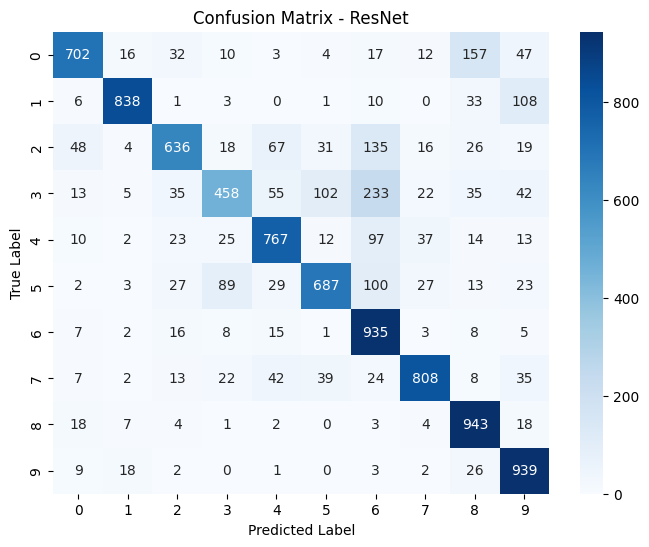

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


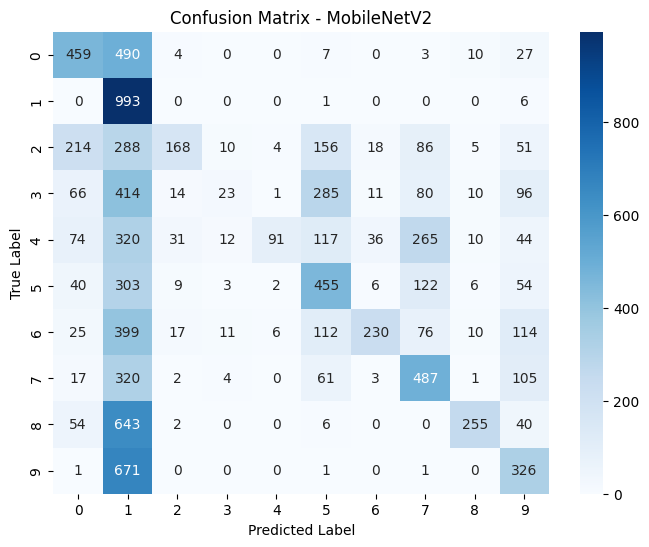

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


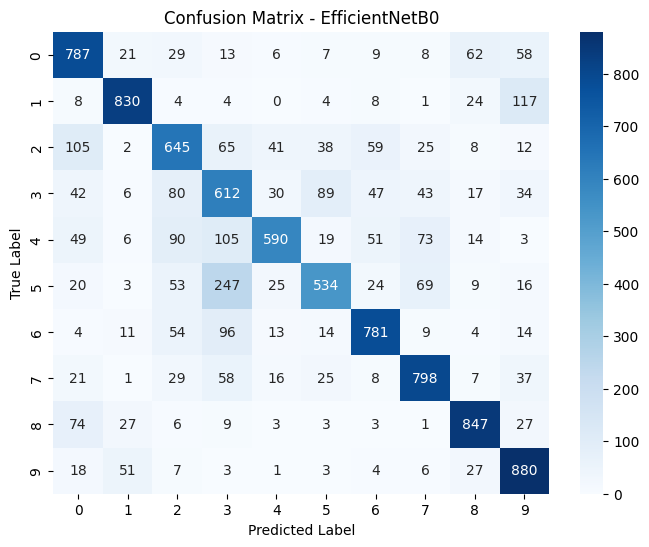

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


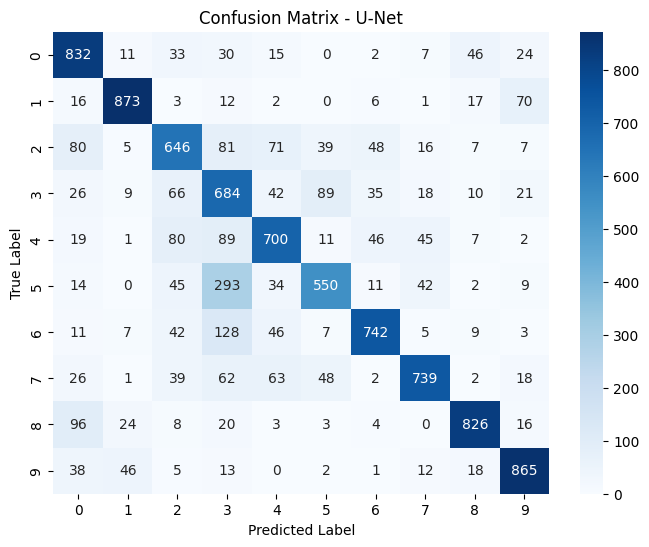

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


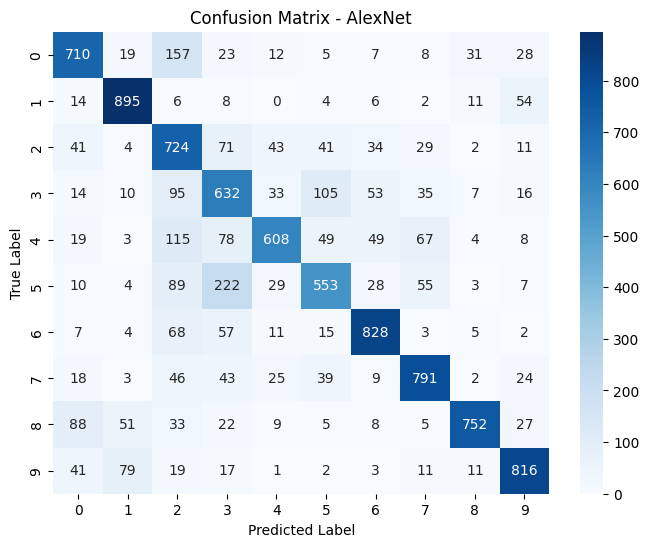

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


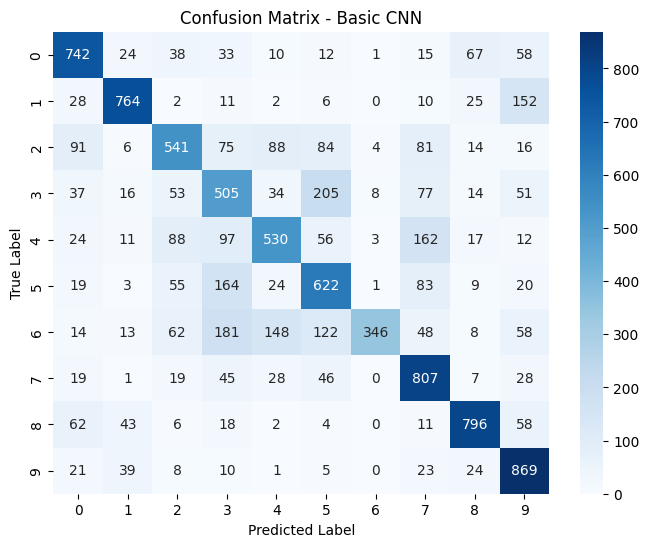

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(model, model_name):
    y_pred = np.argmax(model.predict(x_test), axis=1)  # Convert softmax output to predicted labels
    y_true = np.argmax(y_test, axis=1)  # Get actual labels

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=range(10), yticklabels=range(10))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()
plot_confusion_matrix(resnet_model, "ResNet")
plot_confusion_matrix(mobilenet_model, "MobileNetV2")
plot_confusion_matrix(eff_model, "EfficientNetB0")
plot_confusion_matrix(unet_model, "U-Net")
plot_confusion_matrix(alex_model, "AlexNet")
plot_confusion_matrix(cnn_model, "Basic CNN")


## ROC Curve

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


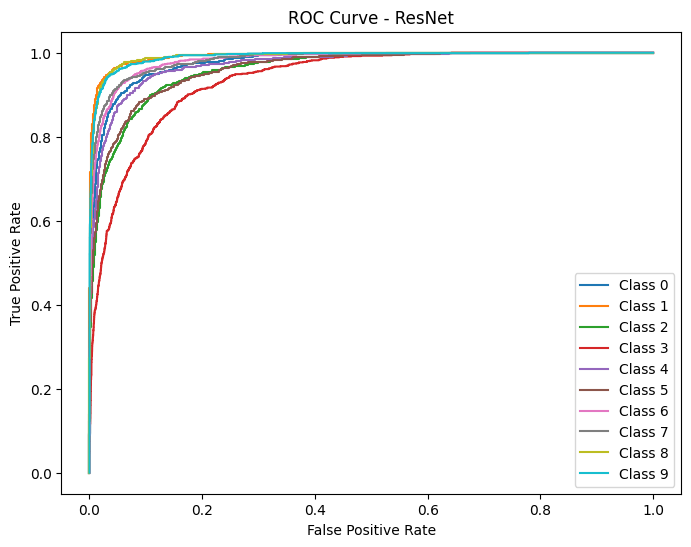

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


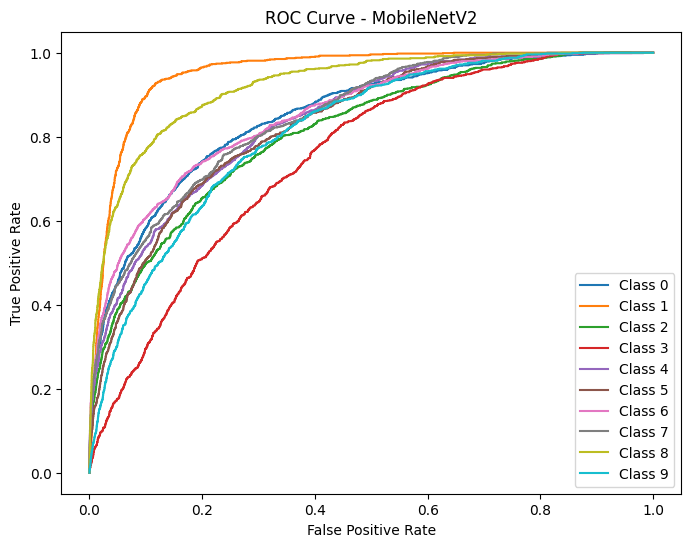

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


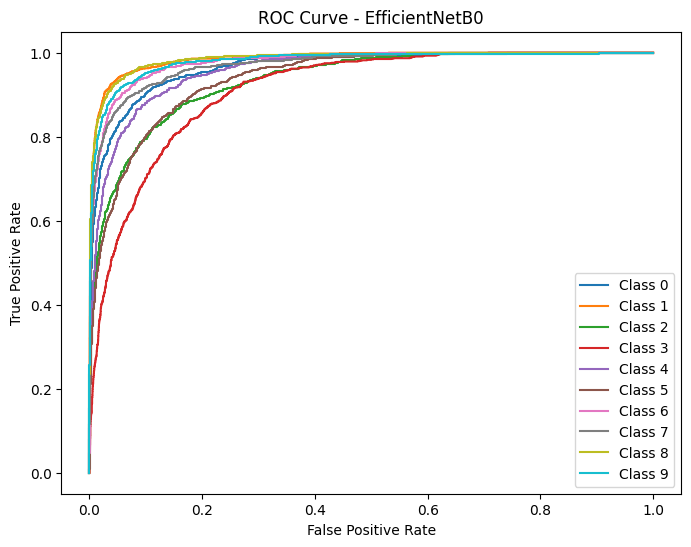

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


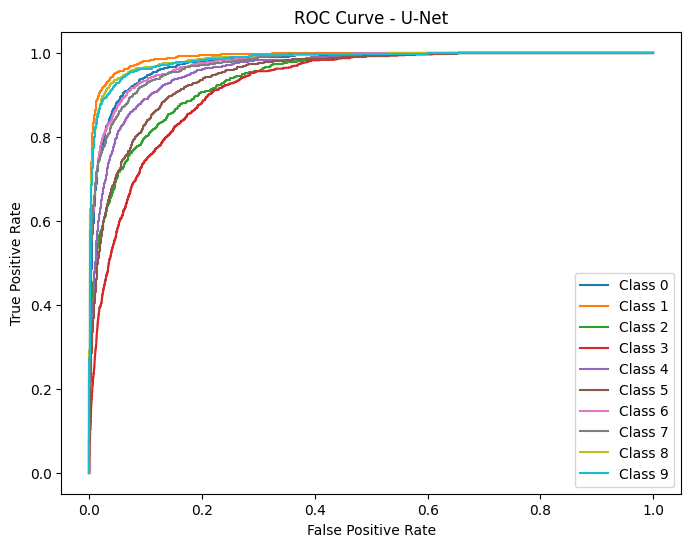

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


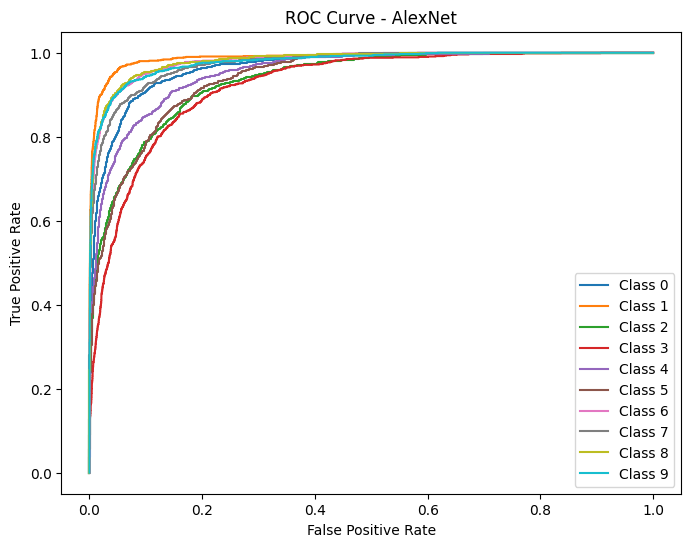

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


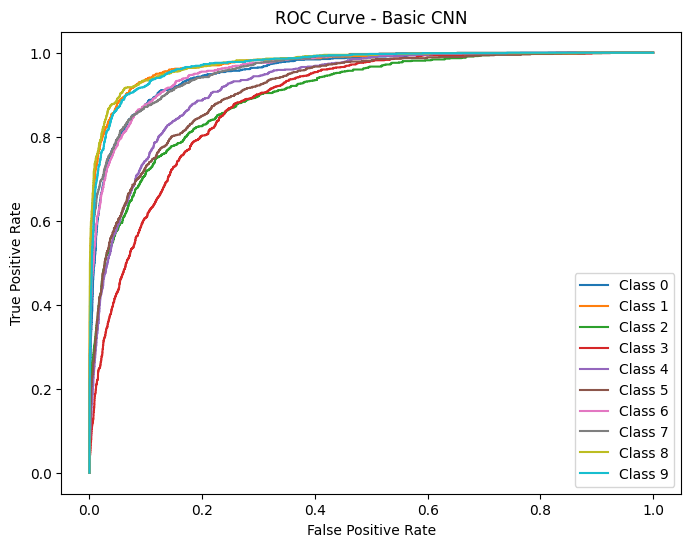

In [29]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def plot_roc_auc(model, model_name):
    y_pred_prob = model.predict(x_test)
    y_test_bin = label_binarize(y_test.argmax(axis=1), classes=range(10))

    plt.figure(figsize=(8,6))
    for i in range(10):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
        plt.plot(fpr, tpr, label=f'Class {i}')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Generate ROC curves for all models
plot_roc_auc(resnet_model, "ResNet")
plot_roc_auc(mobilenet_model, "MobileNetV2")
plot_roc_auc(eff_model, "EfficientNetB0")
plot_roc_auc(unet_model, "U-Net")
plot_roc_auc(alex_model, "AlexNet")
plot_roc_auc(cnn_model, "Basic CNN")


## Testing With New Images

In [47]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

# Load and preprocess a single image
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)  # Load image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (32, 32))  # Resize to CIFAR-10 size
    img = img.astype('float32') / 255.0  # Normalize
    return np.expand_dims(img, axis=0)  # Add batch dimension

# CIFAR-10 class labels
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']

# List of test images (update with actual paths)
test_images = ["/content/LmpwZw", "/content/TT0.1", "/content/Wjc1Tk09"]


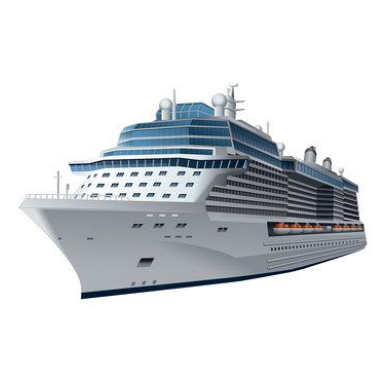

Predictions for image: /content/LmpwZw

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
ResNet: ship
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
MobileNetV2: automobile
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
EfficientNetB0: automobile
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
U-Net: automobile
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
AlexNet: automobile
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Basic CNN: automobile

--------------------------------------------------



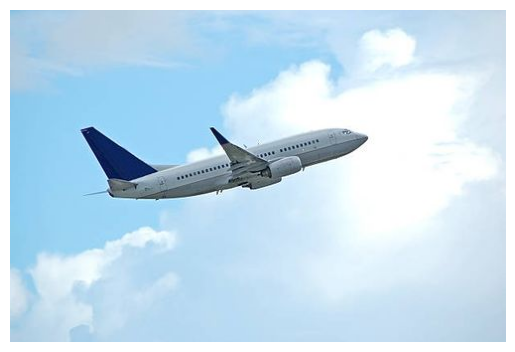

Predictions for image: /content/TT0.1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
ResNet: airplane
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
MobileNetV2: airplane
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
EfficientNetB0: airplane
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
U-Net: airplane
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
AlexNet: bird
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Basic CNN: airplane

--------------------------------------------------



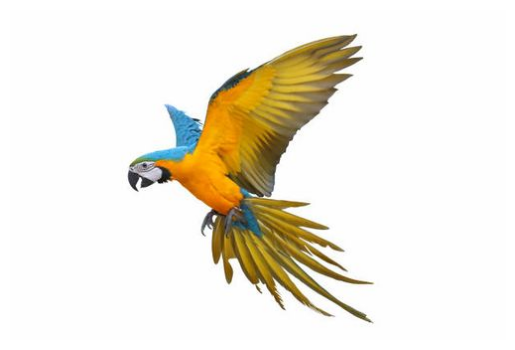

Predictions for image: /content/Wjc1Tk09

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
ResNet: bird
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
MobileNetV2: airplane
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
EfficientNetB0: airplane
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
U-Net: bird
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
AlexNet: bird
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Basic CNN: bird

--------------------------------------------------



In [48]:
# Function to make predictions using all models
def test_all_models(test_images, models_dict):
    for image_path in test_images:
        img = load_and_preprocess_image(image_path)
        plt.imshow(cv2.imread(image_path)[:, :, ::-1])  # Display the image
        plt.axis('off')
        plt.show()

        print(f"Predictions for image: {image_path}\n")

        for model_name, model in models_dict.items():
            pred = model.predict(img)
            predicted_label = cifar10_classes[np.argmax(pred)]
            print(f"{model_name}: {predicted_label}")
        print("\n" + "-"*50 + "\n")

# Dictionary of trained models
models_dict = {
    "ResNet": resnet_model,
    "MobileNetV2": mobilenet_model,
    "EfficientNetB0": eff_model,
    "U-Net": unet_model,
    "AlexNet": alex_model,
    "Basic CNN": cnn_model
}

# Run the test
test_all_models(test_images, models_dict)
